# Ross Cooper

## Research question/interests

What factors affect the aggregate rating of a restaurant? Does the location of the restaurant matter more than the cost of food? Do certain cuisines get rated higher than others?

# Task1

## EDA

In [93]:
#importing pandas and numpy
import pandas as pd
import numpy as np
import seaborn as sns

#reading in CSV's
zomato_df = pd.read_csv("../data/raw/zomato.csv", encoding="latin")
countrycode_df = pd.read_excel("../data/raw/Country-Code.xlsx")

In [94]:
zomato_df.info()
zomato_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


The info of the dataframe shows there are over 9500 rows and 21 columns. However, it looks like some columns such as locality may be very to analyze. Before I begin graphing my data, I wanted to see if there many missing values in my dataset.

In [95]:
zomato_df.isnull().any()

Restaurant ID           False
Restaurant Name         False
Country Code            False
City                    False
Address                 False
Locality                False
Locality Verbose        False
Longitude               False
Latitude                False
Cuisines                 True
Average Cost for two    False
Currency                False
Has Table booking       False
Has Online delivery     False
Is delivering now       False
Switch to order menu    False
Price range             False
Aggregate rating        False
Rating color            False
Rating text             False
Votes                   False
dtype: bool

It seems there are misisng values in the Cuisines column. Best to make chart to visualize how many values are missing.

<AxesSubplot:>

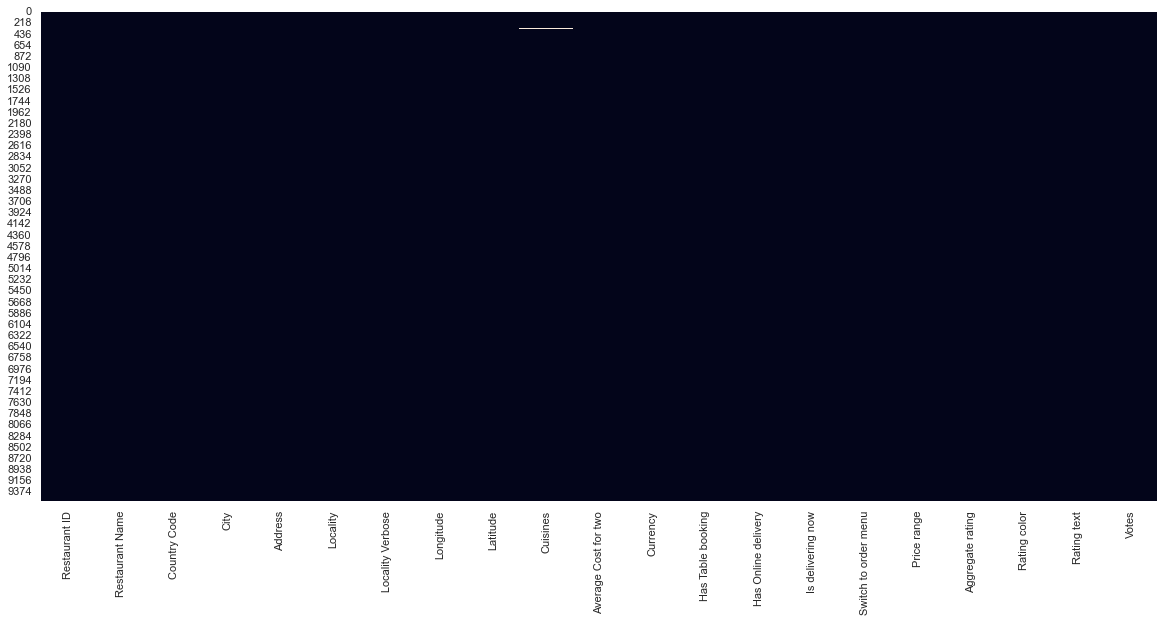

In [96]:
# setting window size
sns.set({'figure.figsize':(20,9)})
sns.heatmap(zomato_df.isnull(), cbar=False)

Well, there seems to be a trivial amount of missing data. It doesn't look like it will affect the analysis. Now we should check whether there are any duplicate values.

In [97]:
zomato_df.duplicated().any()

False

Since we can see that there are very few missing values and no duplicate data, it's time to get a better sense of the aggregate rating as it is what the bulk of my analysis will be on. Firstly, to get a feel of how many countries there are and how many restaurants are in each, I create a barplot to represent this. I don't know which country is represented by each country code so I will merge the Country-Code file with my current dataframe.

In [98]:
# merging the country names by country code
zomato_df = zomato_df.merge(countrycode_df, how="inner", on="Country Code")
print(zomato_df.keys())

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')


<AxesSubplot:>

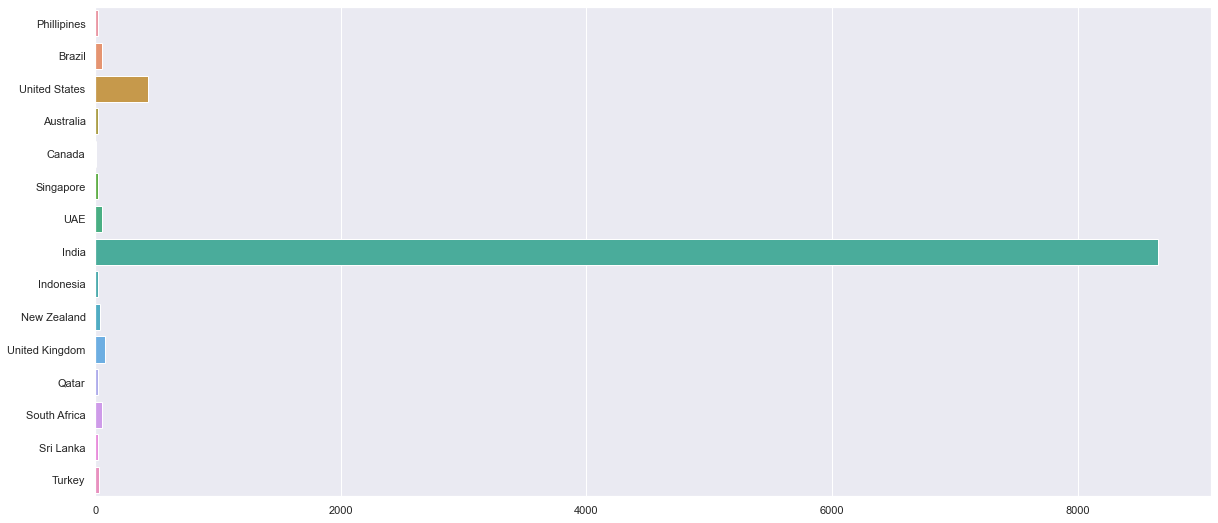

In [100]:
counter = Counter(list(zomato_df["Country"]))
y1 = list(counter.keys())
x1 = list(counter.values())
sns.barplot(x = x1, y = y1)

It seems there are 15 different countries with a very large difference in restaurants per country. This shouldn't affect my question too much but it is good to know most of the data is from India. Next I want to get a sense of the aggregate rating based on country.

<AxesSubplot:xlabel='Country', ylabel='Aggregate rating'>

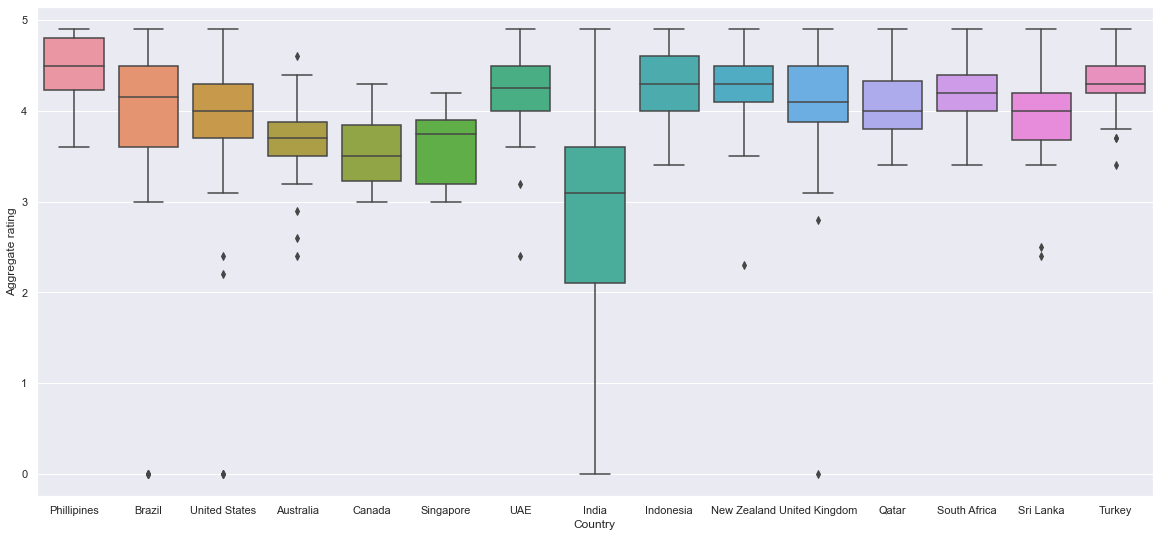

In [103]:
sns.boxplot(x="Country", y="Aggregate rating", data=zomato_df)

It seems there is a greater range of aggregate rating for India which makes sense based on the amount of restaurants in India. I do notice that the lowest rating in India is 0. I don't think that ratings are from 0-5 but rather from 1-5. Therefore, could this be a 'missing value'?

In [112]:
# displays count of each value in aggregate rating
zomato_df["Aggregate rating"].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

It seems there are an unsual amount of 0 values for aggregate rating suggesting no rating was input for these restaurants. With all this in mind, I believe I know enough to begin the analysis pipline.

# Task 2

## 

zomato_df[zomato_df["Country"].isin(["India"])]